# Pima Indians Diabetes Data
----------------------------------------------

### Dataset of 768 records corresponding to 768 females at least 21 years of age of pima indian heritage. The data below consists of 8 features and one class label indicating whether the patient was diabetic or not. The features or independent variables consits of # of times pregnant, Age, BMI etc.

In [400]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [401]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
df = pd.read_csv(url,index_col=False,header=None)


High level DataFrame Observations
-----------------------------------
Data in DataFrame doesn't have any Na values but there are some features where a '0' may indicate missing data. For example 0's in column 1 which indicate patient's pregancy could be 0 while column 3 (blood pressure) 0  indicates missing data

In [402]:
df.isnull().values.any()
df.info

<bound method DataFrame.info of       0    1   2   3    4     5      6   7  8
0     6  148  72  35    0  33.6  0.627  50  1
1     1   85  66  29    0  26.6  0.351  31  0
2     8  183  64   0    0  23.3  0.672  32  1
3     1   89  66  23   94  28.1  0.167  21  0
4     0  137  40  35  168  43.1  2.288  33  1
5     5  116  74   0    0  25.6  0.201  30  0
6     3   78  50  32   88  31.0  0.248  26  1
7    10  115   0   0    0  35.3  0.134  29  0
8     2  197  70  45  543  30.5  0.158  53  1
9     8  125  96   0    0   0.0  0.232  54  1
10    4  110  92   0    0  37.6  0.191  30  0
11   10  168  74   0    0  38.0  0.537  34  1
12   10  139  80   0    0  27.1  1.441  57  0
13    1  189  60  23  846  30.1  0.398  59  1
14    5  166  72  19  175  25.8  0.587  51  1
15    7  100   0   0    0  30.0  0.484  32  1
16    0  118  84  47  230  45.8  0.551  31  1
17    7  107  74   0    0  29.6  0.254  31  1
18    1  103  30  38   83  43.3  0.183  33  0
19    1  115  70  30   96  34.6  0.529  32  1
20

In [403]:
#set up feature array to add it to dataframe column
features = ['pregnacy', 'plasma_glucose_conc','diastolic_blood_pressure','tri_skin_fold_thickness','serum_insulin',
            'bmi','diabetes_pedigree_function','age','classifier']
df.columns = features
df.head()

,pregnacy,plasma_glucose_conc,diastolic_blood_pressure,tri_skin_fold_thickness,serum_insulin,bmi,diabetes_pedigree_function,age,classifier
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### analyze missing data


one thing noticeable for records with missing plasma_glucose conc is that records also tend to have missing serum insulin.

In [404]:
#plasma_glucose_conc
df[df.plasma_glucose_conc == 0]

,pregnacy,plasma_glucose_conc,diastolic_blood_pressure,tri_skin_fold_thickness,serum_insulin,bmi,diabetes_pedigree_function,age,classifier
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


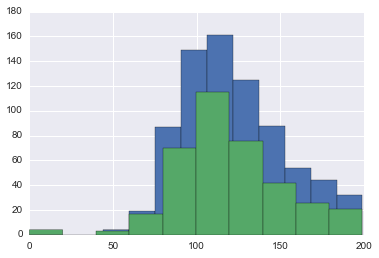

In [405]:
#lets plot the plasma_glucose_conc levels of the missing records to see what kind of distribution we get
import seaborn as sns #only doing this to make things pretty
sns.set_style('darkgrid')
_ = df['plasma_glucose_conc'][df.plasma_glucose_conc != 0].hist()
_t = df['plasma_glucose_conc'][df.serum_insulin ==0].hist()



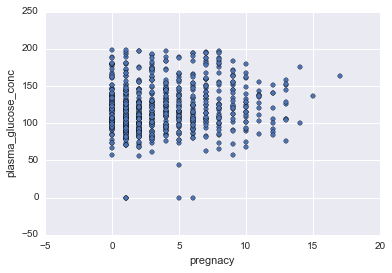

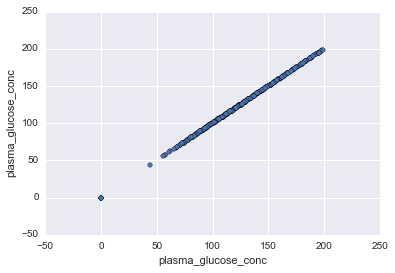

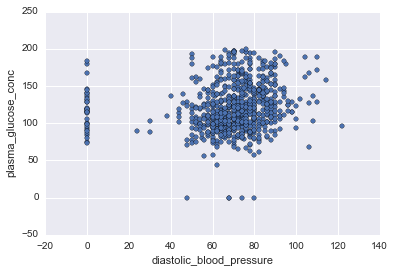

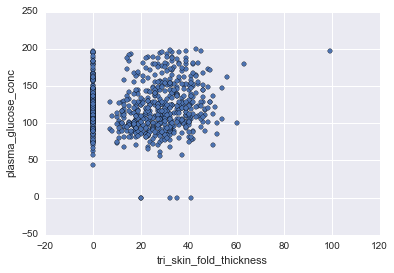

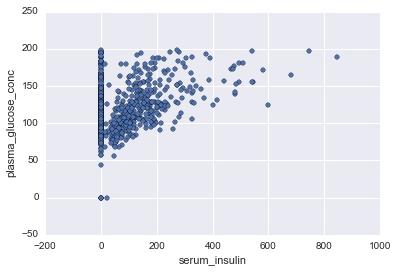

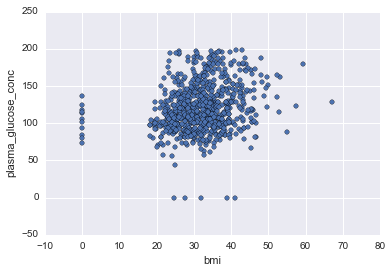

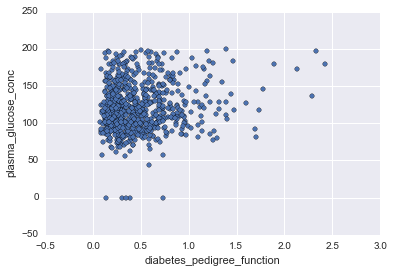

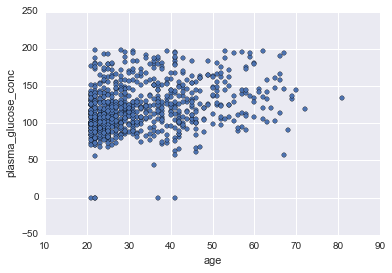

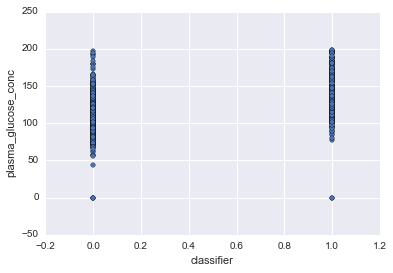

In [406]:
### plasma_glucose_conc doesn't seem to have a strong correlation with any of the other variables. The distribution 
### The distribution does have a positive skew with a mean centered around 100-120.
y ='plasma_glucose_conc'

for column in df:
   df.plot(x=column, y=y, kind="scatter")

/Users/raymondma/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


,pregnacy,plasma_glucose_conc,diastolic_blood_pressure,tri_skin_fold_thickness,serum_insulin,bmi,diabetes_pedigree_function,age,classifier
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1


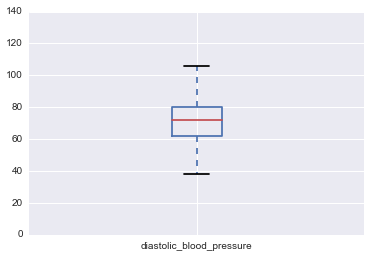

In [407]:
#moving on to diastolic blood pressure
# we can see alot of missing values  and it looks like issing diastolic bp values correspond to missing tri_skin_fold
#or serum_insulin missing values
df.boxplot(column = "diastolic_blood_pressure")
df[df["diastolic_blood_pressure"] ==0]

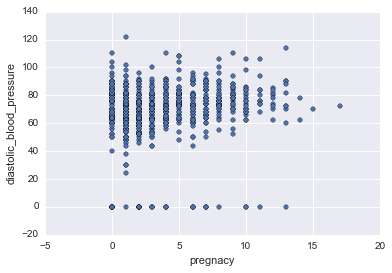

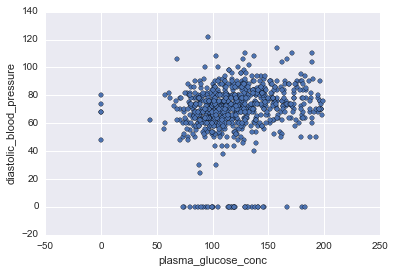

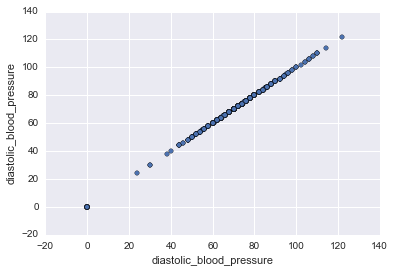

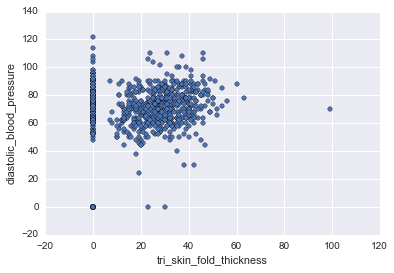

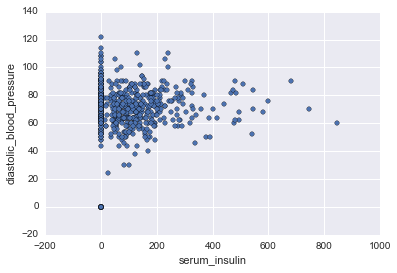

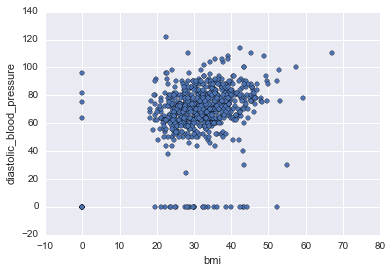

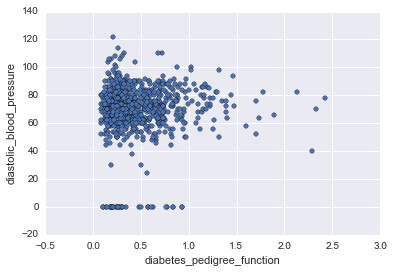

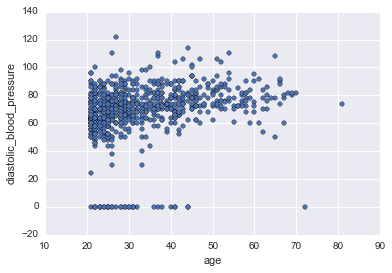

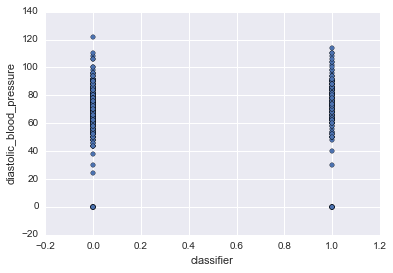

In [408]:
# no major correlation between the other features but I do notice maybe a very slight correlation between bmi and dbp
# and another one with age, but dont think the relationships are small enough that we can impute missing data with mean. 
y= "diastolic_blood_pressure"
for column in df:
   df.plot(x=column, y=y, kind="scatter")


In [409]:
print len(df[df['tri_skin_fold_thickness']==0])
print len(df[(df['tri_skin_fold_thickness']==0) & (df['serum_insulin']==0)])

#a third of the values are actually missing skin foldness and serum insulin. In this case we should drop these rows as
#missing data in one column is a one to one rlationship with the other which could introduce bias to our models.

227
227


In [410]:
clean_df = df[(df['tri_skin_fold_thickness']!=0) & (df['serum_insulin']!=0)]

In [411]:
### There is only one 0-BMI value in the semi-cleaned dataset, but unsurprisingly threre is a correlation between BMI and 
### tri-skin_fold thickness 
clean_df[clean_df['bmi']==0]

,pregnacy,plasma_glucose_conc,diastolic_blood_pressure,tri_skin_fold_thickness,serum_insulin,bmi,diabetes_pedigree_function,age,classifier
371,0,118,64,23,89,0,1.731,21,0


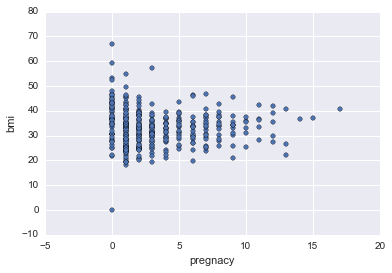

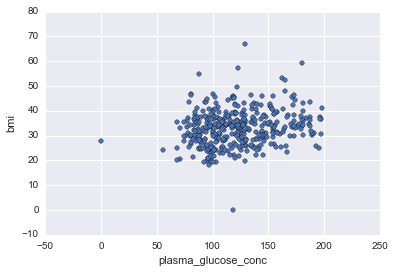

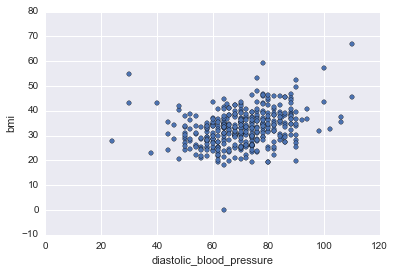

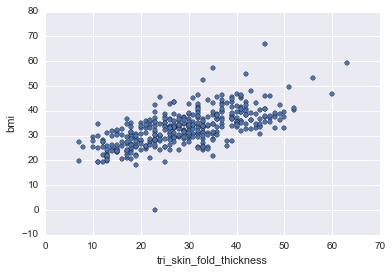

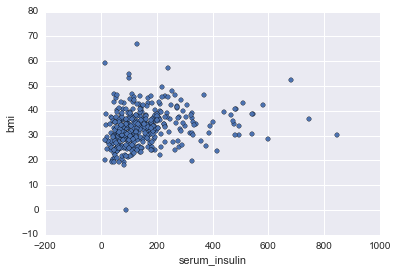

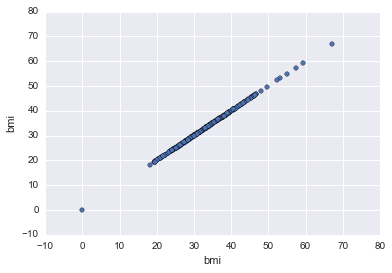

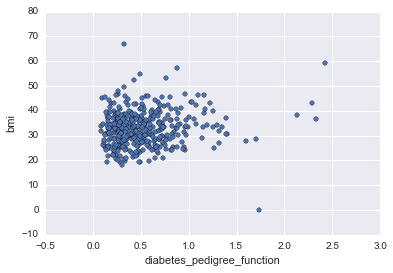

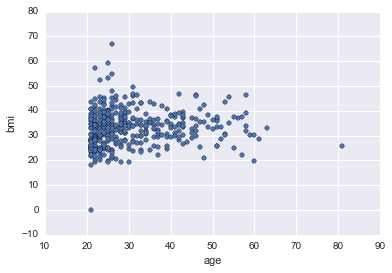

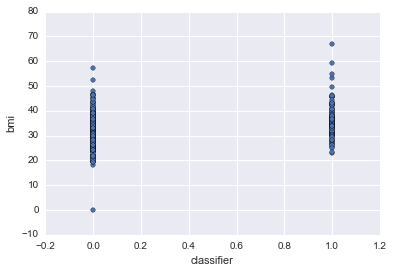

In [412]:
#bmi
y= "bmi"
for column in clean_df:
   clean_df.plot(x=column, y=y, kind="scatter")



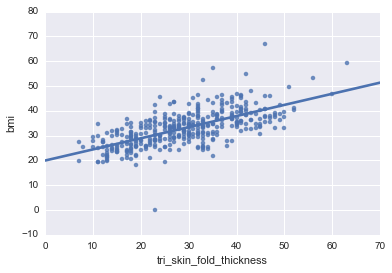

In [413]:
sns.regplot(clean_df['tri_skin_fold_thickness'],clean_df['bmi'], ci=None)

In [414]:
df['diabetes_pedigree_function'].values #all values seem to be filled in so no need ot impute data from this column

array([ 0.627,  0.351,  0.672,  0.167,  2.288,  0.201,  0.248,  0.134,
        0.158,  0.232,  0.191,  0.537,  1.441,  0.398,  0.587,  0.484,
        0.551,  0.254,  0.183,  0.529,  0.704,  0.388,  0.451,  0.263,
        0.254,  0.205,  0.257,  0.487,  0.245,  0.337,  0.546,  0.851,
        0.267,  0.188,  0.512,  0.966,  0.42 ,  0.665,  0.503,  1.39 ,
        0.271,  0.696,  0.235,  0.721,  0.294,  1.893,  0.564,  0.586,
        0.344,  0.305,  0.491,  0.526,  0.342,  0.467,  0.718,  0.248,
        0.254,  0.962,  1.781,  0.173,  0.304,  0.27 ,  0.587,  0.699,
        0.258,  0.203,  0.855,  0.845,  0.334,  0.189,  0.867,  0.411,
        0.583,  0.231,  0.396,  0.14 ,  0.391,  0.37 ,  0.27 ,  0.307,
        0.14 ,  0.102,  0.767,  0.237,  0.227,  0.698,  0.178,  0.324,
        0.153,  0.165,  0.258,  0.443,  0.261,  0.277,  0.761,  0.255,
        0.13 ,  0.323,  0.356,  0.325,  1.222,  0.179,  0.262,  0.283,
        0.93 ,  0.801,  0.207,  0.287,  0.336,  0.247,  0.199,  0.543,
      

In [415]:
df['age'].values #no missing age values

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 30, 34, 57, 59, 51, 32, 31,
       31, 33, 32, 27, 50, 41, 29, 51, 41, 43, 22, 57, 38, 60, 28, 22, 28,
       45, 33, 35, 46, 27, 56, 26, 37, 48, 54, 40, 25, 29, 22, 31, 24, 22,
       26, 30, 58, 42, 21, 41, 31, 44, 22, 21, 39, 36, 24, 42, 32, 38, 54,
       25, 27, 28, 26, 42, 23, 22, 22, 41, 27, 26, 24, 22, 22, 36, 22, 37,
       27, 45, 26, 43, 24, 21, 34, 42, 60, 21, 40, 24, 22, 23, 31, 33, 22,
       21, 24, 27, 21, 27, 37, 25, 24, 24, 46, 23, 25, 39, 61, 38, 25, 22,
       21, 25, 24, 23, 69, 23, 26, 30, 23, 40, 62, 33, 33, 30, 39, 26, 31,
       21, 22, 29, 28, 55, 38, 22, 42, 23, 21, 41, 34, 65, 22, 24, 37, 42,
       23, 43, 36, 21, 23, 22, 47, 36, 45, 27, 21, 32, 41, 22, 34, 29, 29,
       36, 29, 25, 23, 33, 36, 42, 26, 47, 37, 32, 23, 21, 27, 40, 41, 60,
       33, 31, 25, 21, 40, 36, 40, 42, 29, 21, 23, 26, 29, 21, 28, 32, 27,
       55, 27, 57, 52, 21, 41, 25, 24, 60, 24, 36, 38, 25, 32, 32, 41, 21,
       66, 37, 61, 26, 22

In [416]:
clean_df = clean_df.reset_index(drop=True)

In [417]:
from sklearn.linear_model import LinearRegression
# df_for_reg = clean_df[]
# lr = LinearRegression()
df_for_reg = clean_df[clean_df.bmi!=0]
x = df_for_reg['tri_skin_fold_thickness'].values
y = df_for_reg['bmi'].values
regression = np.polyfit(x, y, 1)
# user existing tri_skin_fold_thickness point to fill in missing value 
regression
missing_bmi = regression[0]*ts_point + regression[1]
missing_bmi
clean_df.loc[clean_df['bmi'] == 0, 'bmi'] = missing_bmi
# bmi_DF
### fill in missing data values in column in plasma_glucose with mean.
### fill in missing data value in bmi taking into tri_skin_foldness into account ~ regression

pgc_mean = clean_df['plasma_glucose_conc'][clean_df['plasma_glucose_conc']!=0].mean()
clean_df.loc[clean_df.plasma_glucose_conc == 0,'plasma_glucose_conc'] = pgc_mean



## RUN KNN

In [418]:
#import knn
from sklearn.neighbors import KNeighborsClassifier

#setup variables
model = KNeighborsClassifier(5)
features = ['pregnacy', 'plasma_glucose_conc','diastolic_blood_pressure','tri_skin_fold_thickness','serum_insulin',
            'bmi','diabetes_pedigree_function','age']
to_predict = 'classifier'
data = clean_df[features]
label = clean_df[to_predict]

In [419]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(clean_df[features], label, random_state=1)
myknn = KNeighborsClassifier(5).fit(X_train,y_train)
myknn.predict(X_test)

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0])

In [420]:
myknn.score(X_test, y_test)

0.74747474747474751

In [421]:
##  accuracy of model with a 5-fold CV.
from sklearn.cross_validation import cross_val_score

np.mean(cross_val_score(model, data, label, cv=5))

0.71577409931840308

## KNN classifier score is maximized around k = 37 neighbors with a  meanscore of .78

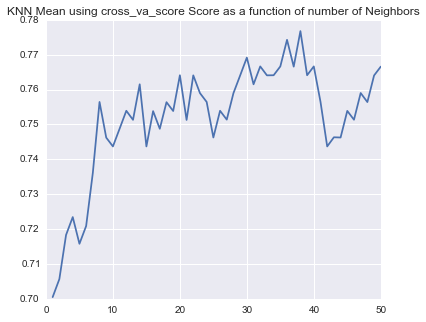

In [422]:
split_num = range(1,51)
scores = []

#Loop through each value for n and calculate the score, appending to our list
for n in split_num:
    scores.append(np.mean(cross_val_score(KNeighborsClassifier(n), data, label, cv=5)))

#Step 2: Put the scores and values for K in a dataframe

k_function_df = pd.DataFrame(split_num, columns=['n'])
k_function_df['scores'] = scores


#Step 3: Plot them!
fig = plt.figure(figsize=(6,5))
plt.title('KNN Mean using cross_va_score Score as a function of number of Neighbors')
_=plt.plot(k_function_df.n, k_function_df.scores)



## Naïve Bayes

In [423]:
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(clean_df[features], label, random_state=1)
nb = MultinomialNB()
y_pred_mnb = nb.fit(X_train, y_train).predict(X_test)


In [424]:
# make predictions on test data using X_test
y_pred_mnb

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1])

In [425]:
# compare predictions 
from sklearn import metrics
print metrics.accuracy_score(y_test, y_pred_mnb)
print metrics.confusion_matrix(y_test, y_pred_mnb)

0.646464646465
[[49 21]
 [14 15]]


## Conclusion Naive Bayes vs KNN 
-----------------------------------------------
#### Naive bayes in this case where we dropped significant rows of data for missing values is not as accurate as our KNN (without tweaking). The KNN outputs a score of 0.78 + for k around 37 while the Naive Bayes outputs a score of 0.64